In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
import datetime as dt
from zigzag_dag26 import zigzag
import talib
from tqdm import tqdm
import colorama as col
import statistics as st
from sklearn.preprocessing import MinMaxScaler

In [2]:
%%time
##### Chargement de la base
base = pd.read_csv('Base_Clean/EURUSDD1.csv')

##### On fixe la date en index sous forme de Timestamp
base.set_index(pd.to_datetime(base.Date),drop=True,inplace=True)

###### On drop les colonnes inutiles
base = base.drop(['Date','Total'],axis=1)

##### On enlève les jours correspondant au samedi et au dimanche
base['WE'] = np.where(((base.index.weekday == 5) | (base.index.weekday == 6)),None,base.index.weekday)
base = base.dropna()
base = base.drop(['WE'],axis=1)

CPU times: user 17.7 ms, sys: 2.87 ms, total: 20.5 ms
Wall time: 19.4 ms


In [3]:
df = base.copy()

In [4]:
%%time
df['StochMod'] = ((df.Close - df.Low.rolling(14).min()) / (df.High.rolling(14).max() - df.Low.rolling(14).min()))*100

CPU times: user 6.06 ms, sys: 1.69 ms, total: 7.75 ms
Wall time: 6.58 ms


In [5]:
df['SD'] = df.Close.rolling(20).std()

In [6]:
scaler = MinMaxScaler((0,100))
df['SDn'] = scaler.fit_transform(df.SD.values.reshape(-1,1))

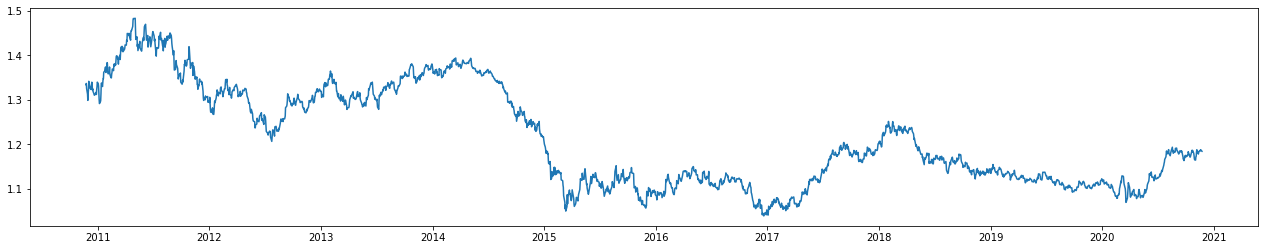

In [7]:
plt.figure(figsize=(22,4))
plt.plot(df.Close)

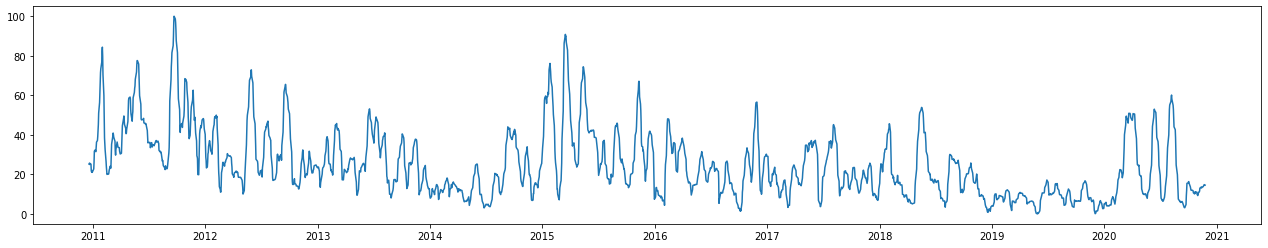

In [8]:
plt.figure(figsize=(22,4))
plt.plot(df.SDn)

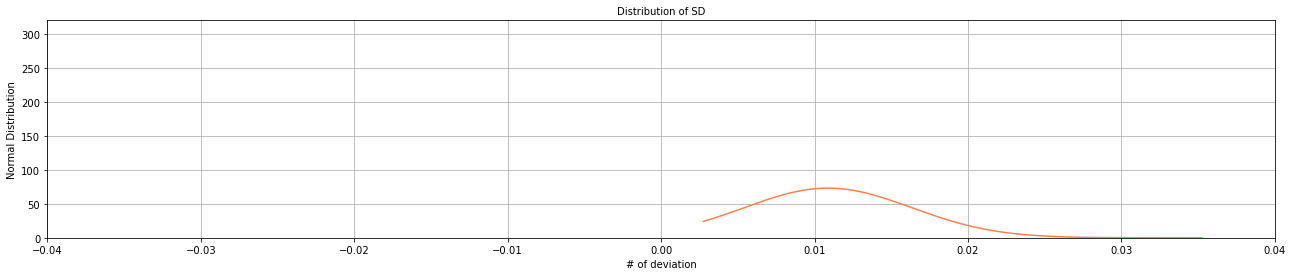

In [9]:
import scipy.stats as stats
plt.figure(figsize=(22,4))

hmean = np.mean(df.SD.sort_values())
hstd = np.std(df.SD.sort_values())
pdf = stats.norm.pdf(df.SD.sort_values(), hmean, hstd)
plt.plot(df.SD.sort_values(), pdf,'coral')
plt.grid()
x_min = -0.04
x_max = 0.04
plt.xlim(x_min,x_max)
plt.ylim(0,320)

plt.title('Distribution of SD',fontsize=10)

plt.xlabel('# of deviation')
plt.ylabel('Normal Distribution')

plt.show()

In [10]:
%%time
from fibostoch import Fibo_Stoch
df = Fibo_Stoch(df)

100%|██████████| 2255/2255 [00:01<00:00, 1531.29it/s]CPU times: user 3.42 s, sys: 82.9 ms, total: 3.5 s
Wall time: 3.51 s



In [11]:
df.tail()

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,StochMod,SD,SDn,Std,Fibo,LowRolling,HighRolling,FiboStoch
Date,,,,,,,,,,,,,,,,,,,,
2020-11-17,1.18492,1.18932,1.18420,1.18609,1.18543,1.18943,1.18430,1.18643,1.185175,1.189375,1.184250,1.186260,81.921260,0.007262,13.855824,13.855824,89,1.116825,1.20115,0.823421
2020-11-18,1.18609,1.18905,1.18486,1.18516,1.18643,1.18916,1.18498,1.18548,1.186260,1.189105,1.184920,1.185320,78.960630,0.007370,14.188560,14.188560,89,1.118500,1.20115,0.808469
2020-11-19,1.18516,1.18821,1.18155,1.18721,1.18548,1.18832,1.18169,1.18775,1.185320,1.188265,1.181620,1.187480,85.763780,0.007449,14.432303,14.432303,89,1.118500,1.20115,0.834604
2020-11-20,1.18721,1.18903,1.18491,1.18549,1.18775,1.18914,1.18504,1.18582,1.187480,1.189085,1.184975,1.185655,80.015748,0.007573,14.812713,14.812713,89,1.118500,1.20115,0.812523
2020-11-23,1.18499,1.19055,1.17994,1.18387,1.18570,1.19067,1.18005,1.18416,1.185345,1.190610,1.179995,1.184015,74.850394,0.007493,14.566931,14.566931,89,1.118500,1.20115,0.792680


In [ ]:
%%time
##### Chargement de la base
df_bt = pd.read_csv('Base_Clean/EURUSDm15.csv')

##### On fixe la date en index sous forme de Timestamp
df_bt.set_index(pd.to_datetime(df_bt.Date),drop=True,inplace=True)

###### On drop les colonnes inutiles
df_bt = df_bt.drop(['Date','Total'],axis=1)

##### On enlève les jours correspondant au samedi et au dimanche
df_bt['WE'] = np.where(((df_bt.index.weekday == 5) | (df_bt.index.weekday == 6)),None,df_bt.index.weekday)
df_bt = df_bt.dropna()
df_bt = df_bt.drop(['WE'],axis=1)

X = df_bt.copy()

In [ ]:
from timerange import timerange1D
X['ATR'] = talib.ATR(X.High,X.Low,X.Close)
df = timerange1D(df)
X = timerange1D(X)
X

In [148]:
%%time
FIB = []
for i in range(len(X)):
    try:
        FIB.append(df[df.TimeRange==X.TimeRange[i]].FiboStoch[0])
    except:
        FIB.append(0)
FIB

df.dropna().FiboStoch

CPU times: user 12.8 s, sys: 96.7 ms, total: 12.9 s
Wall time: 12.9 s


Date
2011-01-10    12.418981
2011-01-11    16.147875
2011-01-12    41.081860
2011-01-13    78.410819
2011-01-14    80.051212
                ...    
2020-11-17    82.342129
2020-11-18    80.846945
2020-11-19    83.460375
2020-11-20    81.252269
2020-11-23    79.267998
Name: FiboStoch, Length: 2221, dtype: float64

In [130]:
df[df.TimeRange=='2011-01-10']

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,StochMod,SD,SDn,Std,Fibo,FiboStoch,ATR,TimeRange
Date,,,,,,,,,,,,,,,,,,,,
2011-01-10,1.29103,1.29635,1.28727,1.295,1.2912,1.2965,1.28744,1.29523,1.291115,1.296425,1.287355,1.295115,13.859618,0.013289,32.419464,32.419464,34,12.418981,0.013703,2011-01-10


In [12]:
_size = 50000
_capital = 250000
_open_buy = 0
_open_sell = 0
_price_buy = 0
_price_sell = 0
_nb_trade = 0
_start_buy = 0
_start_sell = 0
_cpt_buy = 0
_cpt_sell = 0 
_pnl = 0
_win = 0
_los = 0
PNL = []

X = X.dropna()

for i in range(1,len(X)):

    # Brute Closing
    if i == len(X)-1 :
        if _open_buy == 1:
            print("fermeture long en l'air")
            _pnl = _size * (X.Close[i] - _price_buy)
            _nb_trade += 1
            _open_buy = 999
            _open_sell = 999
            _price_buy = 0
            PNL.append(_pnl)
            if _pnl > 0:
                _win += 1
            else:
                _los += 1

        if _open_sell == 1:
            print("fermeture short en l'air")
            _pnl =  - _size * (X.Close[i] - _price_sell)
            _nb_trade += 1
            _open_sell = 999
            _open_buy = 999
            _price_sell = 0
            PNL.append(_pnl)
            if _pnl > 0:
                _win += 1
            else:
                _los += 1

    # Open Long
    if X.FiboStoch[i] >= 10 and X.FiboStoch[i-1] <= 10 and _open_buy == 0 and _open_sell == 0:
        _price_buy = X.Close[i]
        _open_buy = 1
        _start_buy = i
        _cpt_buy += 1


    # TP Short Close
    if (X.Close[i] - _price_sell)/_price_sell <= - 1 * X.ATR[i] and _open_buy == 0 and _open_sell == 1:
        _pnl =  - _size * (X.Close[i] - _price_sell)
        _nb_trade += 1
        _open_sell = 0
        _price_sell = 0
        PNL.append(_pnl)
        if _pnl > 0:
            _win += 1
        else:
            _los += 1

    # SL Close Short
    if (X.Close[i] - _price_sell)/_price_sell >=  2 * X.ATR[i] and _open_buy == 0 and _open_sell == 1:
        _pnl =  - _size * (X.Close[i] - _price_sell)
        _nb_trade += 1
        _open_sell = 0
        _price_sell = 0
        PNL.append(_pnl)
        if _pnl > 0:
            _win += 1
        else:
            _los += 1

    # Open Short
    if X.FiboStoch[i] >= 90 and X.FiboStoch[i-1] <= 90 and _open_buy == 0 and _open_sell == 0:
        _price_sell = X.Close[i]
        _open_sell = 1
        _start_sell = i
        _cpt_sell += 1

    # TP Close Long
    if (X.Close[i] - _price_buy)/_price_buy >=  1 * X.ATR[i] and _open_sell == 0 and _open_buy == 1:
        _pnl = _size * (X.Close[i] - _price_buy)
        _nb_trade += 1
        _open_buy = 0
        _price_buy = 0
        PNL.append(_pnl)
        if _pnl > 0:
            _win += 1
        else:
            _los += 1

    # SL Close Long
    if (X.Close[i] - _price_buy)/_price_buy <= - 2 * X.ATR[i] and _open_sell == 0 and _open_buy == 1:
        _pnl = _size * (X.Close[i] - _price_buy)
        _nb_trade += 1
        _open_buy = 0
        _price_buy = 0
        PNL.append(_pnl)
        if _pnl > 0:
            _win += 1
        else:
            _los += 1

try:
    print('Winner Ratio :',round((1-(_los/_win))*100,2),'%')
except:
    if _win == 0:
        print('Aucun Winner')
    else:
        print('Probleme avec le Ratio')
try:
    print('Profit Factor :',col.Fore.BLUE,round(abs(sum(list(filter(lambda x: x > 0, PNL))) / sum(list(filter(lambda x: x <= 0, PNL)))),2),'%',col.Style.RESET_ALL)
except:
    print(col.Fore.RED,'PNL à O',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Période du',X.index[0],'au ',X.index[-1],col.Style.RESET_ALL)
print('Nombre de trades :',_nb_trade)
print('Nombre de posistions non fermées',(_cpt_buy+_cpt_sell)-_nb_trade)
print('Captital initial :',_capital)
print('Taille des positions :',_size)
if sum(PNL) > 0:
    print('Gain :',col.Fore.GREEN,sum(PNL),col.Style.RESET_ALL)
else:
    print('Gain :',col.Fore.RED,sum(PNL),col.Style.RESET_ALL)
print('Capital Final :',_capital + sum(PNL))
return()


NameError: name 'X' is not defined

In [93]:
X

,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,ATR,TimeRange,FiboStoch
Date,,,,,,,,,,,,,,,
2010-11-26 08:00:00,1.33115,1.33170,1.32167,1.32567,1.33134,1.33184,1.32183,1.32580,1.331245,1.331770,1.321750,1.325735,0.006131,2010-11-26,"Date 2010-11-26 NaN Name: FiboStoch, dtype: ..."
2010-11-26 12:00:00,1.32567,1.32567,1.31997,1.32281,1.32580,1.32580,1.32013,1.32294,1.325735,1.325735,1.320050,1.322875,0.006099,2010-11-26,"Date 2010-11-26 NaN Name: FiboStoch, dtype: ..."
2010-11-26 16:00:00,1.32281,1.32630,1.32114,1.32446,1.32294,1.32648,1.32134,1.32465,1.322875,1.326390,1.321240,1.324555,0.006031,2010-11-26,"Date 2010-11-26 NaN Name: FiboStoch, dtype: ..."
2010-11-26 20:00:00,1.32446,1.32497,1.32290,1.32471,1.32465,1.32515,1.32309,1.32496,1.324555,1.325060,1.322995,1.324835,0.005748,2010-11-26,"Date 2010-11-26 NaN Name: FiboStoch, dtype: ..."
2010-11-29 00:00:00,1.32471,1.32887,1.31809,1.32110,1.32496,1.32921,1.31828,1.32130,1.324835,1.329040,1.318185,1.321200,0.006113,2010-11-29,"Date 2010-11-29 NaN Name: FiboStoch, dtype: ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24 00:00:00,1.18387,1.18468,1.18327,1.18413,1.18416,1.18481,1.18388,1.18425,1.184015,1.184745,1.183575,1.184190,0.002659,2020-11-24,"Series([], Name: FiboStoch, dtype: float64)"
2020-11-24 04:00:00,1.18413,1.18546,1.18410,1.18513,1.18425,1.18556,1.18421,1.18525,1.184190,1.185510,1.184155,1.185190,0.002566,2020-11-24,"Series([], Name: FiboStoch, dtype: float64)"
2020-11-24 08:00:00,1.18513,1.18898,1.18454,1.18828,1.18525,1.18911,1.18466,1.18842,1.185190,1.189045,1.184600,1.188350,0.002701,2020-11-24,"Series([], Name: FiboStoch, dtype: float64)"
